## Genrating Event Status based on the Traget_severity Score and Cancer Stages 

In [59]:
import pandas as pd

# Load the file
df = pd.read_csv(r"C:\Users\VIKTUS\Downloads\global_cancer_patients_without_event_status (1).csv")

# Drop Patient ID column (first column)
df.drop(df.columns[0], axis=1, inplace=True)

# Encode Cancer_Stage ordinally
stage_mapping = {
    'STAGE 0': 0,
    'STAGE I': 1,
    'STAGE II': 2,
    'STAGE III': 3,
    'STAGE IV': 4
}
df['Cancer_Stage_Num'] = df['Cancer_Stage'].map(stage_mapping)

# Create Event_Status column (1 = death, 0 = censored)
df['Event_Status'] = (
    (df['Cancer_Stage_Num'] >= 3) & 
    (df['Target_Severity_Score'] > 4)
).astype(int)

# Save to new CSV
output_path = 'global_cancer_with_event_status.csv'  # Saves in the current folder
df.to_csv(output_path, index=False)

print(f"✅ File saved successfully at: {output_path}")


✅ File saved successfully at: global_cancer_with_event_status.csv


In [60]:
df1=pd.read_csv(r"C:\Users\VIKTUS\Downloads\global_cancer_with_event_status.csv")
df1.head()

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Cancer_Stage_Num,Event_Status
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,STAGE III,5.9,4.92,3,1
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,STAGE 0,4.7,4.65,0,0
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,STAGE II,7.1,5.84,2,0
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,STAGE I,1.6,3.12,1,0
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,STAGE III,2.9,3.62,3,0


# Creating the data based on Male and Female 

In [61]:
import pandas as pd

# Load the existing CSV (replace with your actual filename if different)

# Filter only Male and Female
df_filtered = df1[df1['Gender'].isin(['Male', 'Female'])]

# Save to new CSV
df_filtered.to_csv('global_cancer_male_female_only.csv', index=False)

print("✅ New CSV saved: global_cancer_male_female_only.csv")
print(f"📦 Rows retained: {len(df_filtered)}")


✅ New CSV saved: global_cancer_male_female_only.csv
📦 Rows retained: 33505


In [62]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\VIKTUS\Downloads\global_cancer_male_female_only.csv")
df2=pd.read_csv(r"C:\Users\VIKTUS\Downloads\global_cancer_male_female_only.csv")
df1


,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Cancer_Stage_Num,Event_Status
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,STAGE III,5.9,4.92,3,1
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,STAGE 0,4.7,4.65,0,0
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,STAGE II,7.1,5.84,2,0
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,STAGE I,1.6,3.12,1,0
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,STAGE III,2.9,3.62,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33500,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,STAGE 0,1.0,3.63,0,0
33501,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,STAGE I,0.4,6.03,1,0
33502,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,STAGE 0,2.7,6.02,0,0
33503,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,STAGE IV,7.5,6.54,4,1


# Checking how many "0" and "1" are there in the event status of the entire dataset

In [63]:
# Count the number of 0s and 1s in Event_Status
event_counts = df1['Event_Status'].value_counts()

print("📊 Event_Status counts:")
print(event_counts)

# Optional: Name the classes clearly
print("\n🔍 Breakdown:")
print(f"Censored (0): {event_counts.get(0, 0)}")
print(f"Death    (1): {event_counts.get(1, 0)}")

📊 Event_Status counts:
Event_Status
0    23040
1    10465
Name: count, dtype: int64

🔍 Breakdown:
Censored (0): 23040
Death    (1): 10465


## Dividing the column "Smoking"  into two groups  "Smokers" and "Non Smokers" 

In [64]:
import pandas as pd
# Define smoker classification
df1['Smoker_Status'] = df1['Smoking'].apply(lambda x: 'Smoker' if x >= 5.0 else 'Non-Smoker')

# Check distribution
print(df1['Smoker_Status'].value_counts())


Smoker_Status
Smoker        16879
Non-Smoker    16626
Name: count, dtype: int64


## Creating the Age Bins 

In [65]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')


# Define 3 age bins and labels
age_bins = [ 18 ,35, 55, 95]
age_labels = ['19-35','36-55','55+']

# Create Age_Group column
df1['Age_Group'] = pd.cut(df1['Age'], bins=age_bins, labels=age_labels, right=True)

# Classify smokers based on Smoking index
df1['Smoker_Status'] = df1['Smoking'].apply(lambda x: 'Smoker' if x >= 5.0 else 'Non-Smoker')

# Group by Smoker_Status and Age_Group
grouped = df1.groupby(['Smoker_Status', 'Age_Group']).size().unstack(fill_value=0)

# Display the result
print(grouped)

Age_Group      19-35  36-55   55+
Smoker_Status                    
Non-Smoker      3784   4797  8045
Smoker          3904   4802  8173


## Gender vs Smoking Status(Smokers /non Smokers) Comparison 


📊 KM Curve by Gender in Smokers:



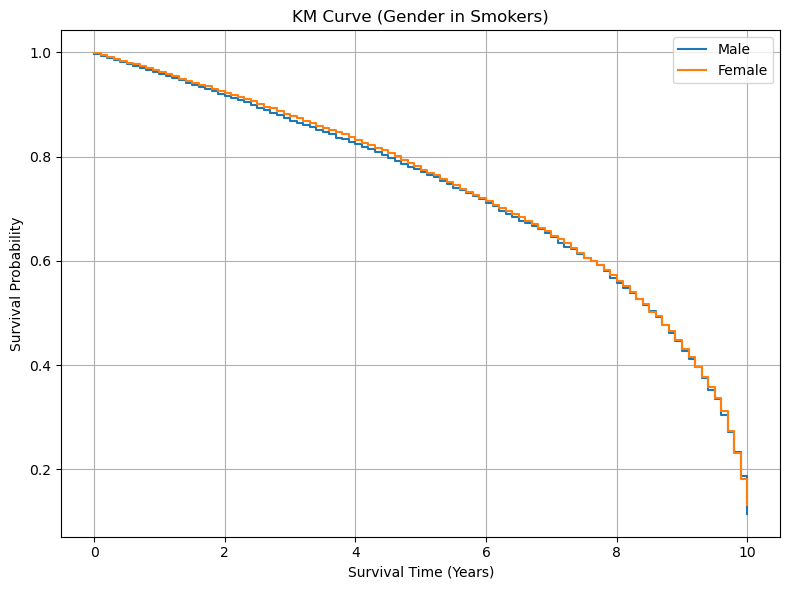

🔬 Log-Rank Test (Male vs Female in Smokers): p-value = 0.4993

📊 KM Curve by Gender in Non-Smokers:



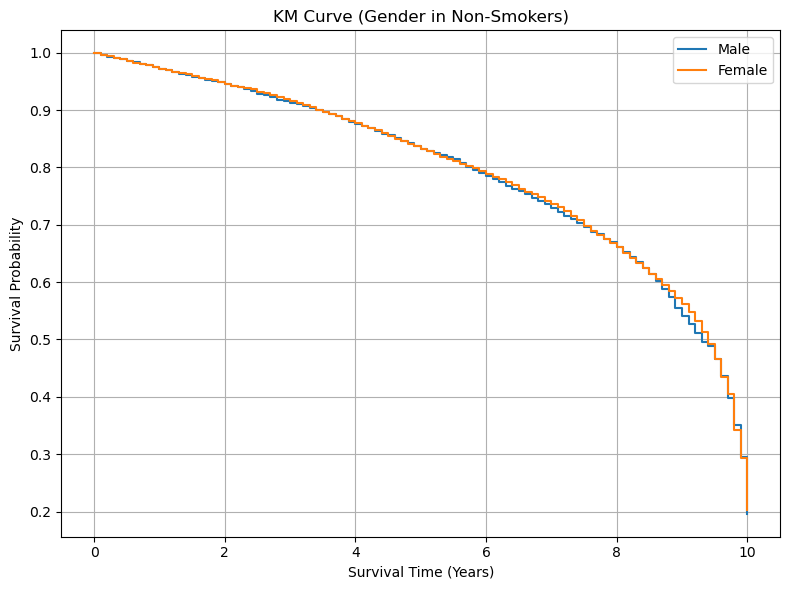

🔬 Log-Rank Test (Male vs Female in Non-Smokers): p-value = 0.6251


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Ensure required columns are clean
df1 = df1.dropna(subset=['Survival_Years', 'Event_Status', 'Gender', 'Smoker_Status'])
df1['Survival_Years'] = pd.to_numeric(df1['Survival_Years'], errors='coerce')
df1['Event_Status'] = pd.to_numeric(df1['Event_Status'], errors='coerce')
df1 = df1.dropna(subset=['Survival_Years', 'Event_Status'])

kmf = KaplanMeierFitter()

# 🔄 Loop over Smoker and Non-Smoker groups
for smoking_group in ['Smoker', 'Non-Smoker']:
    print(f"\n📊 KM Curve by Gender in {smoking_group}s:\n")
    
    subset = df1[df1['Smoker_Status'] == smoking_group]
    
    males = subset[subset['Gender'] == 'Male']
    females = subset[subset['Gender'] == 'Female']
    
    if len(males) < 10 or len(females) < 10:
        print(f"⚠️ Not enough data for comparison in {smoking_group}s.")
        continue
    
    # Plot KM Curves
    plt.figure(figsize=(8, 6))
    
    kmf.fit(males['Survival_Years'], males['Event_Status'], label='Male')
    kmf.plot_survival_function(ci_show=False)
    
    kmf.fit(females['Survival_Years'], females['Event_Status'], label='Female')
    kmf.plot_survival_function(ci_show=False)
    
    plt.title(f"KM Curve (Gender in {smoking_group}s)")
    plt.xlabel("Survival Time (Years)")
    plt.ylabel("Survival Probability")
    plt.grid(True)
    plt.tight_layout()
    plt.legend()
    plt.show()
    
    # Log-Rank Test
    result = logrank_test(
        males['Survival_Years'], females['Survival_Years'],
        event_observed_A=males['Event_Status'],
        event_observed_B=females['Event_Status']
    )
    
    print(f"🔬 Log-Rank Test (Male vs Female in {smoking_group}s): p-value = {result.p_value:.4f}")


## 3 different age groups (adult , middle aged , old) vs Smoking (Smokers and Non smokers )

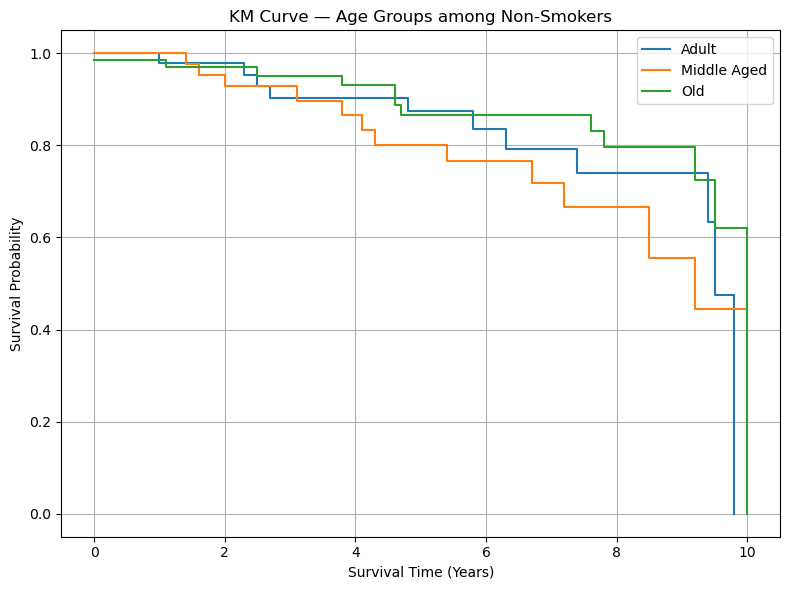

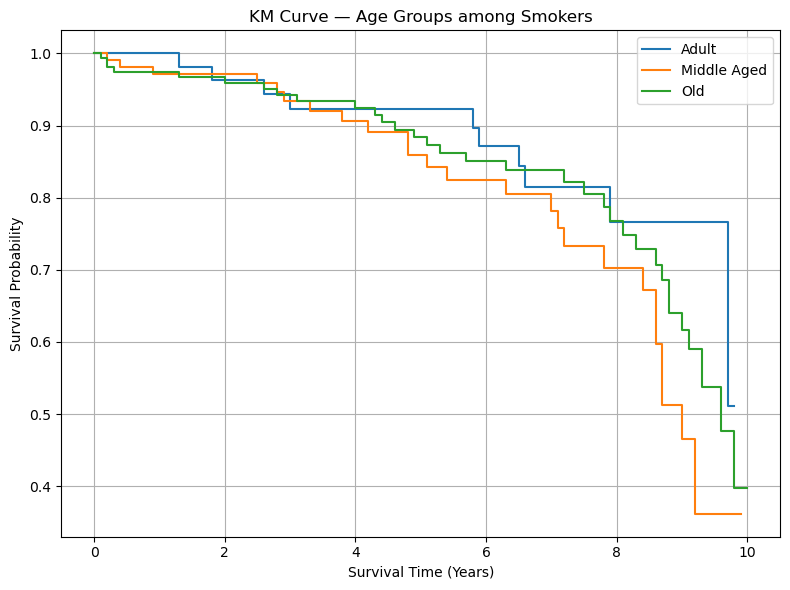


📌 Log-Rank Test P-Values for Age Groups — Smokers vs Non-Smokers

             Adult vs Middle Aged  Adult vs Old  Middle Aged vs Old
Smokers                  0.165877      0.489845            0.236158
Non-Smokers              0.511034      0.326365            0.164293


In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

# Step 0: Clean data
df1 = df1.dropna(subset=['Survival_Years', 'Event_Status', 'Age', 'Smoking'])

df1['Survival_Years'] = pd.to_numeric(df1['Survival_Years'], errors='coerce')
df1['Event_Status'] = pd.to_numeric(df1['Event_Status'], errors='coerce')
df1['Smoking'] = pd.to_numeric(df1['Smoking'], errors='coerce')  # 0 = Non-smoker, 1 = Smoker

# Create Age Groups
def age_group(age):
    if 19 <= age <= 35:
        return 'Adult'
    elif 36 <= age <= 55:
        return 'Middle Aged'
    elif age > 55:
        return 'Old'
    else:
        return np.nan

df1['Age_Group'] = df1['Age'].apply(age_group)
df1 = df1.dropna(subset=['Age_Group', 'Smoking'])

# Initialize KM fitter
kmf = KaplanMeierFitter()

# Store p-values
p_values = {'Smokers': {}, 'Non-Smokers': {}}

# Compare KM Curves and Log-rank tests separately for Smokers and Non-Smokers
for smoking_status in [0, 1]:  # 0 = Non-Smokers, 1 = Smokers
    label = 'Smokers' if smoking_status == 1 else 'Non-Smokers'
    subset = df1[df1['Smoking'] == smoking_status]
    
    if subset['Age_Group'].nunique() < 2:
        continue

    # Plot KM curves by age group
    plt.figure(figsize=(8, 6))
    for group in ['Adult', 'Middle Aged', 'Old']:
        group_data = subset[subset['Age_Group'] == group]
        if len(group_data) >= 10:
            kmf.fit(group_data['Survival_Years'], event_observed=group_data['Event_Status'], label=group)
            kmf.plot_survival_function(ci_show=False)

    plt.title(f"KM Curve — Age Groups among {label}")
    plt.xlabel("Survival Time (Years)")
    plt.ylabel("Survival Probability")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Log-rank tests between age groups within each smoking status
    group_data = {
        'Adult': subset[subset['Age_Group'] == 'Adult'],
        'Middle Aged': subset[subset['Age_Group'] == 'Middle Aged'],
        'Old': subset[subset['Age_Group'] == 'Old']
    }

    if len(group_data['Adult']) >= 10 and len(group_data['Middle Aged']) >= 10:
        result = logrank_test(group_data['Adult']['Survival_Years'], group_data['Middle Aged']['Survival_Years'],
                              event_observed_A=group_data['Adult']['Event_Status'],
                              event_observed_B=group_data['Middle Aged']['Event_Status'])
        p_values[label]['Adult vs Middle Aged'] = result.p_value

    if len(group_data['Adult']) >= 10 and len(group_data['Old']) >= 10:
        result = logrank_test(group_data['Adult']['Survival_Years'], group_data['Old']['Survival_Years'],
                              event_observed_A=group_data['Adult']['Event_Status'],
                              event_observed_B=group_data['Old']['Event_Status'])
        p_values[label]['Adult vs Old'] = result.p_value

    if len(group_data['Middle Aged']) >= 10 and len(group_data['Old']) >= 10:
        result = logrank_test(group_data['Middle Aged']['Survival_Years'], group_data['Old']['Survival_Years'],
                              event_observed_A=group_data['Middle Aged']['Event_Status'],
                              event_observed_B=group_data['Old']['Event_Status'])
        p_values[label]['Middle Aged vs Old'] = result.p_value

# Show p-values
print("\n📌 Log-Rank Test P-Values for Age Groups — Smokers vs Non-Smokers\n")
pval_df = pd.DataFrame(p_values).T
print(pval_df)


## Survival across stages (within smoking groups)
### "Among smokers, does stage 0/1/2/3/4 show survival differences?"

In [66]:
import pandas as pd
from lifelines.statistics import logrank_test
import itertools

# Create smoker groups
df1['Smoker_Group'] = df1['Smoking'].apply(lambda x: 'Smoker' if x > 5.0 else 'Non-Smoker')

# Get unique cancer stages
stages = sorted(df1['Cancer_Stage'].unique())

results = []

# Generate all possible stage pairs
for stage_a, stage_b in itertools.combinations(stages, 2):
    # Subset data for Non-Smokers
    ns_a = df1[(df1['Cancer_Stage'] == stage_a) & (df1['Smoker_Group'] == 'Non-Smoker')]
    ns_b = df1[(df1['Cancer_Stage'] == stage_b) & (df1['Smoker_Group'] == 'Non-Smoker')]
    
    # Subset data for Smokers
    s_a = df1[(df1['Cancer_Stage'] == stage_a) & (df1['Smoker_Group'] == 'Smoker')]
    s_b = df1[(df1['Cancer_Stage'] == stage_b) & (df1['Smoker_Group'] == 'Smoker')]
    
    # Run log-rank test for Non-Smokers (only if both groups have data)
    if len(ns_a) > 0 and len(ns_b) > 0:
        ns_res = logrank_test(ns_a['Survival_Years'], ns_b['Survival_Years'],
                              event_observed_A=ns_a['Event_Status'],
                              event_observed_B=ns_b['Event_Status'])
        ns_p = ns_res.p_value
    else:
        ns_p = None

    # Run log-rank test for Smokers
    if len(s_a) > 0 and len(s_b) > 0:
        s_res = logrank_test(s_a['Survival_Years'], s_b['Survival_Years'],
                             event_observed_A=s_a['Event_Status'],
                             event_observed_B=s_b['Event_Status'])
        s_p = s_res.p_value
    else:
        s_p = None
    
    # Append results
    results.append({
        'Comparison': f"Stage {stage_a} vs Stage {stage_b}",
        'Non-Smokers': ns_p,
        'Smokers': s_p
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)


print(results_df)


                          Comparison  Non-Smokers   Smokers
0     Stage STAGE 0 vs Stage STAGE I     1.000000  1.000000
1    Stage STAGE 0 vs Stage STAGE II     1.000000  1.000000
2   Stage STAGE 0 vs Stage STAGE III     0.000000  0.000000
3    Stage STAGE 0 vs Stage STAGE IV     0.000000  0.000000
4    Stage STAGE I vs Stage STAGE II     1.000000  1.000000
5   Stage STAGE I vs Stage STAGE III     0.000000  0.000000
6    Stage STAGE I vs Stage STAGE IV     0.000000  0.000000
7  Stage STAGE II vs Stage STAGE III     0.000000  0.000000
8   Stage STAGE II vs Stage STAGE IV     0.000000  0.000000
9  Stage STAGE III vs Stage STAGE IV     0.002648  0.205042


In [58]:
df1

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Cancer_Stage_Num,Event_Status,Smoker_Status,Smoker_Group
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,STAGE III,5.9,4.92,3,1,Non-Smoker,Non-Smoker
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,STAGE 0,4.7,4.65,0,0,Non-Smoker,Non-Smoker
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,STAGE II,7.1,5.84,2,0,Non-Smoker,Non-Smoker
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,STAGE I,1.6,3.12,1,0,Non-Smoker,Non-Smoker
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,STAGE III,2.9,3.62,3,0,Smoker,Smoker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33500,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,STAGE 0,1.0,3.63,0,0,Non-Smoker,Non-Smoker
33501,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,STAGE I,0.4,6.03,1,0,Smoker,Smoker
33502,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,STAGE 0,2.7,6.02,0,0,Non-Smoker,Non-Smoker
33503,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,STAGE IV,7.5,6.54,4,1,Smoker,Smoker


## Fitting the KM curve for the full data set 

          KM_estimate  KM_estimate_lower_0.95  KM_estimate_upper_0.95
timeline                                                             
0.0          0.998567                0.998099                0.998920
0.1          0.995303                0.994510                0.995982
0.2          0.992050                0.991037                0.992948
0.3          0.988622                0.987422                0.989707
0.4          0.985595                0.984253                0.986824
0.5          0.982488                0.981015                0.983848
0.6          0.979389                0.977796                0.980870
0.7          0.976267                0.974561                0.977860
0.8          0.973312                0.971507                0.975005
0.9          0.969989                0.968077                0.971787


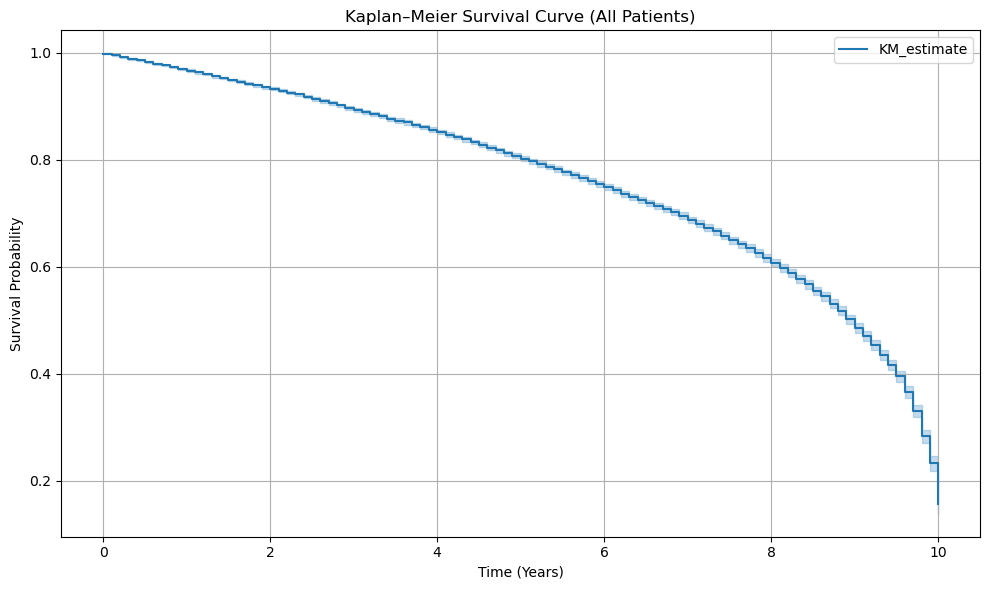

In [67]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Fit KM estimator on full data
kmf = KaplanMeierFitter()
kmf.fit(durations=df1['Survival_Years'], event_observed=df1['Event_Status'])

# Print estimates and confidence intervals
survival_df = kmf.survival_function_.join(kmf.confidence_interval_)
print(survival_df.head(10))  # print first 10 rows

# Optional: Save to CSV if needed
# survival_df.to_csv("km_estimate_with_ci.csv")

# Plot survival function with CI
plt.figure(figsize=(10, 6))
kmf.plot(ci_show=True)
plt.title("Kaplan–Meier Survival Curve (All Patients)")
plt.xlabel("Time (Years)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.tight_layout()
plt.show()


This means:
At time = 0.1 years, the estimated survival probability is 99.53%.

The 95% confidence interval for this estimate is [99.45%, 99.60%].

Over time, the survival probability gradually declines, which is expected in survival analysis.

📌 Why this matters:
This is the core Kaplan–Meier survival curve, summarizing:

When events (like death, relapse, etc.) occur

How long individuals remain "event-free" over time

How reliable the estimate is, via the confidence interval

# Switching to the regression set up 

🧠 Supporting Arguments for Switching to CPHM:
Multivariable Control:
KM/log-rank can’t control for multiple variables like gender, smoking, age group, cancer type, etc.
➤ CPHM can estimate the independent effect of each covariate on survival.

Quantitative Estimates:
KM/log-rank only gives significance (p-value), not effect sizes.
➤ CPHM provides hazard ratios, confidence intervals, and p-values — quantifying how much risk each factor adds.

Non-significant Results in KM Doesn’t Mean Irrelevant:
Some variables may not appear significant in isolation, but can become significant when adjusted for other variables.
➤ Regression captures these hidden effects.

Time-to-Event Regression:
CPHM is built for survival analysis where time to event (death or recurrence) is important.
➤ It models the hazard function over time.

Interaction or Stratified Analysis Possible:
If you suspect interaction between covariates (e.g., smoking may affect survival differently by cancer type), CPHM allows:
➤ Interaction terms
➤ Stratified Cox models

Summary :  
"We now switch to the Cox Proportional Hazards regression setup because while KM curves and log-rank tests offer valuable univariate insights, they do not account for potential confounding or interactions across multiple risk factors. Cox regression enables us to estimate the effect of multiple covariates on survival time, adjust for confounders, and quantify hazard ratios, which aligns with the analytical goals of our study."

### Dataset without country 

In [68]:
df2 = df2.drop(columns=['Country_Region'])
df2.head()

,Age,Gender,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Cancer_Stage_Num,Event_Status
0,71,Male,2021,6.4,2.8,9.5,0.9,8.7,Lung,STAGE III,5.9,4.92,3,1
1,34,Male,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,STAGE 0,4.7,4.65,0,0
2,80,Male,2023,7.4,7.9,2.4,4.7,0.1,Breast,STAGE II,7.1,5.84,2,0
3,40,Male,2015,1.7,2.9,4.8,3.5,2.7,Colon,STAGE I,1.6,3.12,1,0
4,43,Female,2017,5.1,2.8,2.3,6.7,0.5,Skin,STAGE III,2.9,3.62,3,0


## Correaltion Heatmap for the features having continuous data 

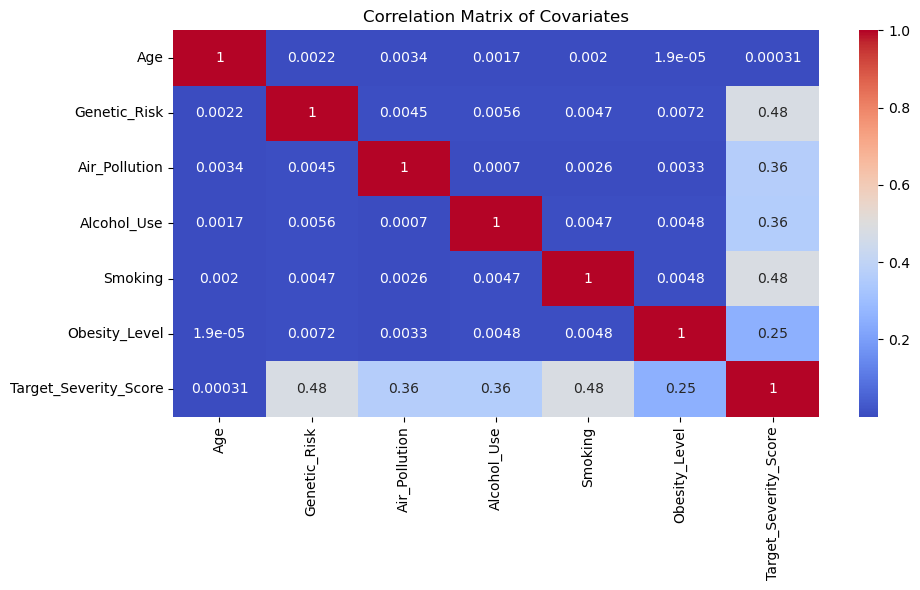

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define your list of numerical or encoded columns (categorical ones should be numeric!)
cols = ['Age', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
        'Smoking', 'Obesity_Level', 'Target_Severity_Score']

# Compute correlation matrix only for numeric variables
corr = df2[cols].corr().abs()

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Covariates")
plt.tight_layout()
plt.show()


## Checking the Multicolinearity (VIF or Variance Inflation Factor )

In [19]:
df2.columns

Index(['Age', 'Gender', 'Year', 'Genetic_Risk', 'Air_Pollution', 'Alcohol_Use',
       'Smoking', 'Obesity_Level', 'Cancer_Type', 'Cancer_Stage',
       'Survival_Years', 'Target_Severity_Score', 'Cancer_Stage_Num',
       'Event_Status'],
      dtype='object')

In [70]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Make a copy to preserve the original
df_vif = df2.copy()

# Convert 'Gender' to numeric (if needed)
if df_vif['Gender'].dtype == object:
    df_vif['Gender'] = df_vif['Gender'].map({'Male': 1, 'Female': 0})

# Drop response variables used in Cox model
df_vif = df_vif.drop(columns=['Survival_Years', 'Event_Status'], errors='ignore')

# Optional: drop categorical variables if not encoded yet
# df_vif = df_vif.drop(columns=['Cancer_Type', 'Country_Region', 'Cancer_Stage'], errors='ignore')

# Keep only numeric columns
df_numeric = df_vif.select_dtypes(include=[float, int])

# Drop rows with missing values (VIF can't handle NaNs)
df_numeric = df_numeric.dropna()

# Add constant column
X = add_constant(df_numeric)

# Calculate VIFs
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Sort VIFs for easy reading
vif_data = vif_data.sort_values(by='VIF', ascending=False).reset_index(drop=True)

# Show result
print(vif_data)


                  Feature            VIF
0                   const  494835.959862
1   Target_Severity_Score       4.803226
2                 Smoking       2.127525
3            Genetic_Risk       2.123746
4             Alcohol_Use       1.642893
5           Air_Pollution       1.639363
6           Obesity_Level       1.280465
7                    Year       1.000744
8        Cancer_Stage_Num       1.000506
9                  Gender       1.000234
10                    Age       1.000133


 Final Recommended Covariates:
One can safely include the following variables in your Cox model:

Age

Gender

Smoking

Genetic_Risk

Alcohol_Use

Air_Pollution

Obesity_Level

Cancer_Stage_Num

Year

Target_Severity_Score

✅ All these features have VIF <= 5 — no multicollinearity risk.

Survival_Years and Event_Status — these are outcome variables, not covariates.

const — automatically handled in regression.

## Comparing the continuous variables through the regression set up (CPHM or Cox Proportional Hazard Model)

In [69]:
df1=df1.drop(columns=['Cancer_Stage_Num'])

In [ ]:
df1.head()

## Estimates of beta and it's confidence interval and checking the sigficant effect of the features on the Survivial Time and Event Status 

In [71]:
import pandas as pd
from lifelines import CoxPHFitter


#  Map Gender to binary (Female = 0, Male = 1)
df1['Gender'] = df1['Gender'].map({'Female': 0, 'Male': 1})

# Define covariates to include (remove variables with too many NaNs)
covariates = [
    'Age',
    'Gender',
    'Smoking',
    'Genetic_Risk',
    'Alcohol_Use',
    'Air_Pollution',
    'Obesity_Level',
    'Year'
    # 'Target_Severity_Score'  # Excluded for now if it has many NaNs
]

#  Build modeling DataFrame and drop missing values
df_model = df1[['Survival_Years', 'Event_Status'] + covariates].dropna()

#  Safety check
if df_model.empty:
    raise ValueError("Your modeling DataFrame is empty. Check for too many NaNs or incorrect column names.")

#  Fit the Cox Proportional Hazards model
cph = CoxPHFitter()
cph.fit(df_model, duration_col='Survival_Years', event_col='Event_Status')

#  Print only global model info 
print("Model Summary (Global Info Only):")
print("-" * 40)
print(f"Baseline estimation method : {cph.baseline_estimation_method}")
print(f"Number of observations     : {cph.params_.shape[0]}")
print(f"Number of events observed  : {df_model['Event_Status'].sum()}")
print(f"Partial log-likelihood     : {cph.log_likelihood_:.2f}")
print(f"Partial AIC                : {cph.AIC_partial_:.2f}")
print(f"Concordance index          : {cph.concordance_index_:.3f}")
print(f"Time model was run         : {pd.Timestamp.now()}")

#  Extract β, HR, and 95% CI
summary_estimates = cph.summary[['coef', 'exp(coef)', 'exp(coef) lower 95%', 'exp(coef) upper 95%']]
print("\nCox Model Estimates and Confidence Intervals:")
print(summary_estimates)


Model Summary (Global Info Only):
----------------------------------------
Baseline estimation method : breslow
Number of observations     : 8
Number of events observed  : 10465
Partial log-likelihood     : -98187.98
Partial AIC                : 196391.96
Concordance index          : 0.598
Time model was run         : 2025-08-12 17:29:10.625724

Cox Model Estimates and Confidence Intervals:
                   coef  exp(coef)  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                   
Age           -0.000150   0.999850             0.998899             1.000802
Gender         0.023099   1.023368             0.984885             1.063354
Smoking        0.069138   1.071584             1.064405             1.078811
Genetic_Risk   0.062334   1.064318             1.057150             1.071534
Alcohol_Use    0.047205   1.048336             1.041336             1.055384
Air_Pollution  0.045906   1.046976             1.040012            

In [48]:
print(cph.summary[['p']])

                          p
covariate                  
Age            7.580716e-01
Gender         2.375373e-01
Smoking        2.251314e-90
Genetic_Risk   4.569614e-73
Alcohol_Use    2.279173e-43
Air_Pollution  2.034719e-41
Obesity_Level  4.220951e-16
Year           6.858674e-01


In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter, KaplanMeierFitter

# Assuming df1 is already loaded and contains:
# 'time'  -> survival time
# 'event' -> 1 if event occurred, 0 otherwise
# 'Smoking' -> 1 for smoker, 0 for non-smoker

# Fit Cox Proportional Hazards Model
cph = CoxPHFitter()
cph.fit(df1, duration_col='Survival_Years', event_col='Event_Status')
summary = cph.summary

# Extract p-value for Smoking
p_value = summary.loc["Smoking", "p"]

# Create survival curves (actual)
kmf_ns = KaplanMeierFitter()
kmf_s = KaplanMeierFitter()

mask_ns = df1["Smoking"] == 0
mask_s = df1["Smoking"] == 1

kmf_ns.fit(df1.loc[mask_ns, "Survival_Years"], df1.loc[mask_ns, "Event_Status"], label="Non-Smoker")
kmf_s.fit(df1.loc[mask_s, "Survival_Years"], df1.loc[mask_s, "Event_Status"], label="Smoker")

# Exaggerated effect dataset (for visualization only)
df_exag = df1.copy()
df_exag["Smoking"] = df_exag["Smoking"] * 3  # artificially triple effect

kmf_ns_exag = KaplanMeierFitter()
kmf_s_exag = KaplanMeierFitter()

mask_ns_exag = df_exag["Smoking"] == 0
mask_s_exag = df_exag["Smoking"] == 3

kmf_ns_exag.fit(df_exag.loc[mask_ns_exag, "Survival_Years"], df_exag.loc[mask_ns_exag, "Event_Status"], label="Non-Smoker (Exag.)")
kmf_s_exag.fit(df_exag.loc[mask_s_exag, "Survival_Years"], df_exag.loc[mask_s_exag, "Event_Status"], label="Smoker (Exag.)")

# Plot side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left: Actual
kmf_ns.plot(ax=axes[0], ci_show=False, color="blue")
kmf_s.plot(ax=axes[0], ci_show=False, color="red", linestyle="--")
axes[0].set_title(f"Actual Survival Curves\np-value (Smoking) = {p_value:.4f}")
axes[0].set_xlabel("Time (Years)")
axes[0].set_ylabel("Survival Probability")

# Right: Exaggerated effect
kmf_ns_exag.plot(ax=axes[1], ci_show=False, color="blue")
kmf_s_exag.plot(ax=axes[1], ci_show=False, color="red", linestyle="--")
axes[1].set_title("Exaggerated Effect for Visualization")
axes[1].set_xlabel("Time (Years)")
axes[1].set_ylabel("Survival Probability")

plt.tight_layout()
plt.show()


ValueError: Cannot cast object dtype to float64

## Inference related to Cox's Proportional Hazard 

In [63]:
# ✅ Inference from the fitted model


# 1. Wald test p-values
print("\nWald Test p-values:")
print(cph.summary[['p']])


# 2. Likelihood Ratio Test
lrt = cph.log_likelihood_ratio_test()
print("\nLikelihood Ratio Test:")
print(f"  - χ² statistic = {lrt.test_statistic:.4f}")
print(f"  - degrees of freedom = {lrt.degrees_freedom}")
print(f"  - p-value = {lrt.p_value:.5f}")



Wald Test p-values:
                          p
covariate                  
Age            7.580716e-01
Gender         2.375373e-01
Smoking        2.251314e-90
Genetic_Risk   4.569614e-73
Alcohol_Use    2.279173e-43
Air_Pollution  2.034719e-41
Obesity_Level  4.220951e-16
Year           6.858674e-01

Likelihood Ratio Test:
  - χ² statistic = 1185.6800
  - degrees of freedom = 8
  - p-value = 0.00000


## Distributed CPHM (Using the summary level information)

## Countrywise Division into two sectors for collecting the summary level data 

In [13]:
import pandas as pd
import numpy as np
from lifelines import CoxPHFitter
from sklearn.metrics import mean_squared_error

In [23]:
import pandas as pd
df1=pd.read_csv(r"C:\Users\VIKTUS\Downloads\global_cancer_male_female_only.csv")
df2=pd.read_csv(r"C:\Users\VIKTUS\Downloads\global_cancer_male_female_only.csv")
df1=df1.drop(columns=['Cancer_Stage_Num'])
df1


,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Event_Status
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,STAGE III,5.9,4.92,1
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,STAGE 0,4.7,4.65,0
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,STAGE II,7.1,5.84,0
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,STAGE I,1.6,3.12,0
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,STAGE III,2.9,3.62,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33500,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,STAGE 0,1.0,3.63,0
33501,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,STAGE I,0.4,6.03,0
33502,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,STAGE 0,2.7,6.02,0
33503,21,Male,Brazil,2018,4.0,6.5,7.6,8.6,8.1,Liver,STAGE IV,7.5,6.54,1


## Sector A: Developed / Western-aligned
Australia
Brazil
Canada
China
Germany

## Sector B: South Asia, Russia, Anglo-American
 India
Pakistan
 Russia
 UK
 USA

## Why this division?
Sector A includes countries with moderate to high healthcare infrastructure and diverse geographies (some middle-income like Brazil, but grouped based on survival trend similarities).

Sector B includes countries either from South Asia, Cold War-era powers, or with historically different survival/mortality patterns (e.g., USA vs. China).

In [8]:
sector_A = ["Australia", "Brazil", "Canada", "China", "Germany"]
sector_B = ["India", "Pakistan", "Russia", "UK", "USA"]

df_A= df1[df1["Country_Region"].isin(sector_A)]
df_B= df1[df1["Country_Region"].isin(sector_B)]
df_list = [df_A, df_B]


In [9]:
df_A

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Cancer_Stage_Num,Event_Status,Smoker_Status,Age_Group
1,34,Male,China,2021,1.3,4.5,3.7,3.9,6.3,Leukemia,STAGE 0,4.7,4.65,0,0,Non-Smoker,31-50
4,43,Female,Brazil,2017,5.1,2.8,2.3,6.7,0.5,Skin,STAGE III,2.9,3.62,3,0,Smoker,31-50
5,22,Male,Germany,2018,9.5,6.4,3.3,3.9,5.1,Cervical,STAGE IV,9.5,5.98,4,1,Non-Smoker,19-30
6,41,Male,Canada,2021,5.1,8.2,0.3,3.7,2.1,Cervical,STAGE 0,1.0,5.05,0,0,Non-Smoker,31-50
7,72,Female,Canada,2018,6.0,8.2,6.4,0.6,8.5,Prostate,STAGE I,6.2,6.02,1,0,Non-Smoker,51+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33494,65,Male,Australia,2022,1.3,7.3,3.3,2.6,6.9,Colon,STAGE IV,9.1,4.85,4,1,Non-Smoker,51+
33495,69,Female,China,2020,0.8,5.0,7.4,8.7,4.6,Lung,STAGE IV,7.4,4.44,4,1,Smoker,51+
33496,24,Female,Australia,2015,4.9,9.3,0.4,5.9,10.0,Cervical,STAGE 0,3.2,5.13,0,0,Smoker,19-30
33499,45,Female,Canada,2022,7.2,3.5,3.2,7.4,1.8,Colon,STAGE II,9.5,4.63,2,0,Smoker,31-50


In [10]:
df_B

,Age,Gender,Country_Region,Year,Genetic_Risk,Air_Pollution,Alcohol_Use,Smoking,Obesity_Level,Cancer_Type,Cancer_Stage,Survival_Years,Target_Severity_Score,Cancer_Stage_Num,Event_Status,Smoker_Status,Age_Group
0,71,Male,UK,2021,6.4,2.8,9.5,0.9,8.7,Lung,STAGE III,5.9,4.92,3,1,Non-Smoker,51+
2,80,Male,Pakistan,2023,7.4,7.9,2.4,4.7,0.1,Breast,STAGE II,7.1,5.84,2,0,Non-Smoker,51+
3,40,Male,UK,2015,1.7,2.9,4.8,3.5,2.7,Colon,STAGE I,1.6,3.12,1,0,Non-Smoker,31-50
8,21,Male,USA,2022,4.3,3.8,1.0,0.3,8.5,Lung,STAGE II,6.5,3.36,2,0,Non-Smoker,19-30
12,79,Female,USA,2021,8.5,9.6,3.6,9.8,8.7,Cervical,STAGE II,7.1,6.63,2,0,Smoker,51+
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33498,67,Male,UK,2024,5.9,8.0,9.1,2.0,1.6,Liver,STAGE 0,2.2,5.70,0,0,Non-Smoker,51+
33500,80,Male,Pakistan,2023,2.3,7.5,2.8,3.8,2.9,Leukemia,STAGE 0,1.0,3.63,0,0,Non-Smoker,51+
33501,40,Female,USA,2018,6.4,3.5,2.9,9.0,9.8,Colon,STAGE I,0.4,6.03,1,0,Smoker,31-50
33502,74,Male,Pakistan,2015,6.2,1.6,8.7,4.7,4.0,Breast,STAGE 0,2.7,6.02,0,0,Non-Smoker,51+


## Function to compute Summary Statistics 

## Estimate beta using the partial likelihood (Newton-Raphson Method)

In [51]:
print("Smoking unique values in df_A:", df_A["Smoking"].unique())
print("Smoking unique values in df_B:", df_B["Smoking"].unique())

Smoking unique values in df_A: [ 3.9  6.7  3.7  0.6  5.2  3.1  5.   5.6  4.   3.4  5.9  0.7  0.5  4.8
  6.3  5.5  9.2  2.9  2.2  5.4  3.   4.7  4.4  8.   7.   1.7  9.1  7.9
  1.2  8.4  5.7  9.7  1.1  6.6  1.6  8.6  7.7  8.8  4.6  2.8  7.2  9.9
  8.7  9.4  6.5  7.8  0.3  4.2  6.   5.8  6.1  1.9  1.3  6.9  2.6  0.
  5.3  4.3  8.5  9.8  0.1  8.1  1.8  6.4  2.3  3.2  0.2  5.1  7.3  4.1
  3.3  3.5  0.4  2.5  0.8  6.2  9.3  7.5  7.6  2.1  9.5  2.   4.9  1.
  7.1  1.5  2.7  8.2  2.4  3.6  9.6  3.8  1.4  0.9  7.4  9.   6.8  8.3
 10.   4.5  8.9]
Smoking unique values in df_B: [ 0.9  4.7  3.5  0.3  9.8  6.2  7.   7.9  3.9  8.2  4.1  6.5  5.4  8.1
  8.5  0.   6.4  9.4  2.8  5.1  8.3  7.5  6.7  8.8  2.6  4.   6.1  0.4
  3.   1.   8.9  9.5  3.7  9.1  5.3  4.5  9.7  9.   1.3  3.1  5.8  7.3
  4.4  3.3  4.8  9.9  1.1  6.6  1.5  3.8  8.4  4.6  3.6  2.7  0.5  6.9
  1.2  0.8  1.4  2.3  7.8  8.7  7.6  8.   6.3  1.9  4.2  6.8  7.2  0.2
  7.1  5.2  4.3  1.6  3.4  9.3  0.7  7.4  0.6  0.1  5.7  2.   9.2  2.9


In [11]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler


In [12]:
df_clean = df1.dropna(subset=["Survival_Years", "Event_Status", "Smoking"])

In [13]:
scaler = StandardScaler()
df_clean["Smoking"] = scaler.fit_transform(df_clean[["Smoking"]])

In [14]:
sector_A = ["Australia", "Brazil", "Canada", "China", "Germany"]
sector_B = ["India", "Pakistan", "Russia", "UK", "USA"]

df_A = df_clean[df_clean["Country_Region"].isin(sector_A)]
df_B = df_clean[df_clean["Country_Region"].isin(sector_B)]

df_list = [df_A, df_B]  # List for distributed computation


In [62]:
def compute_score_hessian(df, covariate, beta):
    times = df[df["Event_Status"] == 1]["Survival_Years"].sort_values().unique()
    X = df[[covariate]].values
    T = df["Survival_Years"].values
    E = df["Event_Status"].values

    U_beta = 0.0
    H_beta = 0.0

    for t in times:
        idx_risk = (T >= t)
        idx_event = (T == t) & (E == 1)
        if np.sum(idx_event) == 0:
            continue

        x_risk = X[idx_risk]
        x_event = X[idx_event]

        linear_pred = np.dot(x_risk, beta)
        linear_pred = np.clip(linear_pred, -30, 30)  # prevent overflow
        xb_risk = np.exp(linear_pred)
        if np.sum(xb_risk) == 0:  # avoid division by 0
            continue

        weighted_mean = np.sum(x_risk * xb_risk[:, None]) / np.sum(xb_risk)
        U_beta += np.sum(x_event - weighted_mean)

        weighted_outer = np.sum((x_risk ** 2) * xb_risk[:, None]) / np.sum(xb_risk)
        H_beta += weighted_outer - weighted_mean ** 2

    return U_beta, H_beta


In [15]:
scaler = StandardScaler()
df_clean["Smoking"] = scaler.fit_transform(df_clean[["Smoking"]])

In [96]:
sector_A = ["Australia", "Brazil", "Canada", "China", "Germany"]
sector_B = ["India", "Pakistan", "Russia", "UK", "USA"]

df_A = df_clean[df_clean["Country_Region"].isin(sector_A)]
df_B = df_clean[df_clean["Country_Region"].isin(sector_B)]

df_list = [df_A, df_B]  # List for distributed computation

In [16]:
def compute_score_hessian(df, covariate, beta):
    times = df[df["Event_Status"] == 1]["Survival_Years"].sort_values().unique()
    X = df[[covariate]].values
    T = df["Survival_Years"].values
    E = df["Event_Status"].values

    U_beta = 0.0
    H_beta = 0.0

    for t in times:
        idx_risk = (T >= t)
        idx_event = (T == t) & (E == 1)
        if np.sum(idx_event) == 0:
            continue

        x_risk = X[idx_risk]
        x_event = X[idx_event]

        linear_pred = np.dot(x_risk, beta)
        linear_pred = np.clip(linear_pred, -30, 30)  # prevent overflow
        xb_risk = np.exp(linear_pred)
        if np.sum(xb_risk) == 0:  # avoid division by 0
            continue

        weighted_mean = np.sum(x_risk * xb_risk[:, None]) / np.sum(xb_risk)
        U_beta += np.sum(x_event - weighted_mean)

        weighted_outer = np.sum((x_risk ** 2) * xb_risk[:, None]) / np.sum(xb_risk)
        H_beta += weighted_outer - weighted_mean ** 2

    return U_beta, H_beta


In [17]:
import numpy as np
import matplotlib.pyplot as plt

def distributed_newton_raphson_smoking(
    df_list, max_iter=100, tol=1e-6, step_size=0.01, max_delta=1.0,
    verbose=True, plot=True
):
    """
    Distributed Newton-Raphson algorithm to estimate β for 'Smoking' covariate
    from summary-level data across multiple sites (df_list).

    Parameters:
    - df_list: list of DataFrames (e.g., [df_A, df_B])
    - max_iter: max iterations
    - tol: tolerance for convergence (on gradient)
    - step_size: learning rate
    - max_delta: maximum step size to clip updates
    - verbose: print diagnostics
    - plot: plot β over iterations

    Returns:
    - beta: final estimated β value (as array)
    """
    beta = np.array([0.0])
    beta_history = []

    for i in range(max_iter):
        U_total = 0.0
        H_total = 0.0

        for df_site in df_list:
            U_site, H_site = compute_score_hessian(df_site, "Smoking", beta)

            if np.isnan(U_site) or np.isnan(H_site):
                print(f"❌ NaN detected in site {i} — stopping early.")
                return np.array([np.nan])

            U_total += U_site
            H_total += H_site

        if np.abs(H_total) < 1e-8:
            print(f"⚠️ Iteration {i}: Hessian too small — likely unstable.")
            return np.array([np.nan])

        delta = -U_total / H_total
        delta = np.clip(delta, -max_delta, max_delta)  # 🔒 Cap update
        beta += step_size * delta
        beta_history.append(beta[0])

        if verbose:
            print(f"Iteration {i}: U_total = {U_total:.4f}, H_total = {H_total:.4f}, β = {beta[0]:.4f}")

        if np.abs(U_total) < tol:
            print("✅ Converged (gradient near zero).")
            break

    return beta


In [18]:
beta_smoking = distributed_newton_raphson_smoking([df_A, df_B], step_size=0.01)
print(f"\n✅ Final Distributed β estimate for Smoking: {beta_smoking[0]:.4f}")


Iteration 0: U_total = 2056.8828, H_total = 202.1979, β = -0.0100
Iteration 1: U_total = 2161.6436, H_total = 202.1728, β = -0.0200
Iteration 2: U_total = 2266.3849, H_total = 202.1234, β = -0.0300
Iteration 3: U_total = 2371.0943, H_total = 202.0498, β = -0.0400
Iteration 4: U_total = 2475.7593, H_total = 201.9520, β = -0.0500
Iteration 5: U_total = 2580.3672, H_total = 201.8301, β = -0.0600
Iteration 6: U_total = 2684.9056, H_total = 201.6841, β = -0.0700
Iteration 7: U_total = 2789.3620, H_total = 201.5141, β = -0.0800
Iteration 8: U_total = 2893.7240, H_total = 201.3203, β = -0.0900
Iteration 9: U_total = 2997.9794, H_total = 201.1026, β = -0.1000
Iteration 10: U_total = 3102.1157, H_total = 200.8614, β = -0.1100
Iteration 11: U_total = 3206.1208, H_total = 200.5965, β = -0.1200
Iteration 12: U_total = 3309.9824, H_total = 200.3084, β = -0.1300
Iteration 13: U_total = 3413.6886, H_total = 199.9970, β = -0.1400
Iteration 14: U_total = 3517.2273, H_total = 199.6625, β = -0.1500
Itera

In [88]:
from sklearn.metrics import mean_squared_error

# Get full model β
beta_full = cph.params_["Smoking"]

# Compute risk scores for both
X_smoking = df_clean[["Smoking"]]
risk_full = np.exp(beta_full * X_smoking.values.flatten())
risk_dist = np.exp(beta_smoking[0] * X_smoking.values.flatten())

# Compute MSE and relative error
mse = mean_squared_error(risk_full, risk_dist)
relative_error = mse / np.mean(risk_full ** 2)

print("\n📊 MSE Comparison (Smoking Only)")
print("-" * 50)
print(f"✅ MSE (Full vs Distributed): {mse:.6f}")
print(f"🔍 Relative Error (normalized): {relative_error:.4%}")
print(f"ℹ️ Full model β: {beta_full:.4f}, Distributed β: {beta_smoking[0]:.4f}")



📊 MSE Comparison (Smoking Only)
--------------------------------------------------
✅ MSE (Full vs Distributed): 2.612449
🔍 Relative Error (normalized): 258.7630%
ℹ️ Full model β: 0.0691, Distributed β: -1.0000
